<a href="https://colab.research.google.com/github/parthkohli92/Practice-Projects/blob/main/Scraping%2BPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install YahooFinancials
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for YahooFinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=a3a71f5082fce56720614bc1347cc44e57d00088bb945edcb2d09280aac91eba
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built YahooFinancials


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf

In [ ]:
stock= yf.download(input('Enter your stock:'), start='2016-01-01', end='2021-08-17')

Enter your stock:TCS
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(stock)

             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2016-01-04   8.04   8.28   7.91   8.17   7.637174   349500
2016-01-05   8.20   8.25   7.61   7.76   7.253913   372300
2016-01-06   7.61   7.71   7.36   7.57   7.076304   281800
2016-01-07   7.46   7.95   7.06   7.18   6.711739  1051300
2016-01-08   5.12   5.15   4.02   4.22   3.944782  8768600
...           ...    ...    ...    ...        ...      ...
2021-08-10  11.65  12.41  11.61  12.23  12.230000   933000
2021-08-11  12.25  12.38  11.79  12.30  12.300000   578800
2021-08-12  12.32  12.54  12.12  12.19  12.190000   509100
2021-08-13  12.19  12.28  12.01  12.09  12.090000   512300
2021-08-16  12.00  12.15  11.60  11.65  11.650000   459800

[1415 rows x 6 columns]


In [ ]:
df = pd.DataFrame.from_dict(stock)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,8.04,8.28,7.91,8.17,7.637174,349500
2016-01-05,8.20,8.25,7.61,7.76,7.253913,372300
2016-01-06,7.61,7.71,7.36,7.57,7.076304,281800
2016-01-07,7.46,7.95,7.06,7.18,6.711739,1051300
2016-01-08,5.12,5.15,4.02,4.22,3.944782,8768600
...,...,...,...,...,...,...
2021-08-10,11.65,12.41,11.61,12.23,12.230000,933000
2021-08-11,12.25,12.38,11.79,12.30,12.300000,578800
2021-08-12,12.32,12.54,12.12,12.19,12.190000,509100


In [ ]:
import matplotlib.pyplot as plt

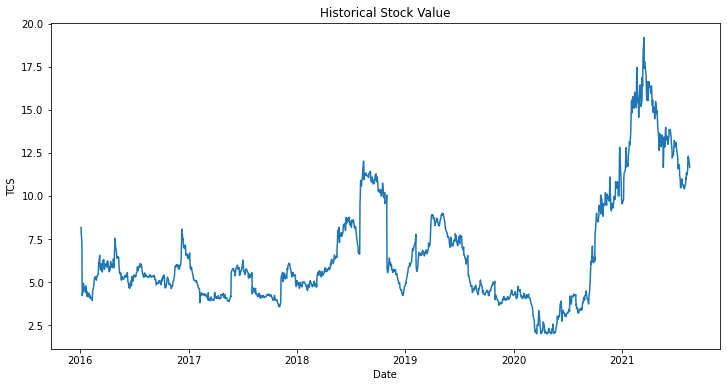

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel("TCS")
plt.show()

In [ ]:
import math

In [ ]:
close_prices = df['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)*0.7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
import numpy as np


In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## TEST SET

In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

In [ ]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(200, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 100)               120400    
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 284,551
Trainable params: 284,551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
931/931 [==============================] - 77s 77ms/step - loss: 0.0015
Epoch 2/3
931/931 [==============================] - 62s 67ms/step - loss: 8.6616e-04
Epoch 3/3
931/931 [==============================] - 63s 67ms/step - loss: 5.2499e-04


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

14/14 [==============================] - 2s 74ms/step


0.465779351175956

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


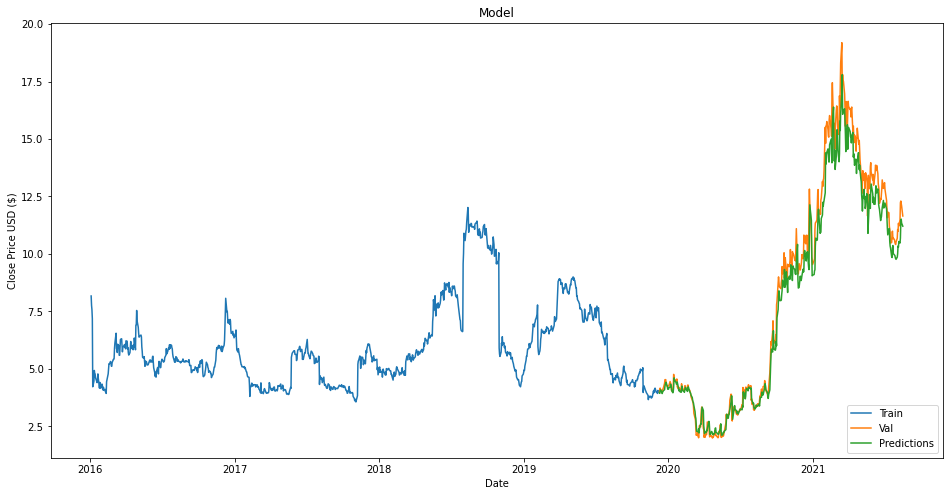

In [ ]:
data = df.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))